## Data Organization
Prior to answering any of the proposed research questions, it is first necessary to organize the imported dataset and contextualize the features that will be used. In the context of this project, the dataset consists of 89 columns. These columns can be grouped based on sections in the questionnaire. There are also columns that are not relevant to the our research questions and simply provides meta-data. 

In [1]:
# Let's import the necessary libraries
import pandas as pd

In [2]:
# Read in the dataset 
df = pd.read_csv('wgm_full_wave2_public_file_final_csv.csv',na_values=" ", keep_default_na=False,low_memory=False)

# Print the first five entries
df.head()

,COUNTRYNEW,WPID_RANDOM,WGT,PROJWT,FIELD_DATE,YEAR_WAVE,W1,W2,W3,W4,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
0,United States,178216898,0.803440,211560.29700,10/01/2020,2020,2,1,2.0,2.0,...,3,4,4,2,2,5.0,9,4,2,6.0
1,United States,159107018,0.729590,192114.26740,10/01/2020,2020,1,1,3.0,1.0,...,1,1,1,1,3,4.0,9,4,1,1.0
2,United States,203166417,0.848559,223440.98710,10/01/2020,2020,1,1,3.0,1.0,...,1,1,2,1,3,4.0,9,4,1,1.0
3,United States,201061719,0.341083,89813.41772,10/01/2020,2020,2,1,3.0,2.0,...,3,3,4,2,3,4.0,9,4,2,1.0
4,United States,195404162,0.995933,262247.16630,10/01/2020,2020,3,1,2.0,1.0,...,2,2,3,1,2,2.0,9,4,4,6.0


In [3]:
# Looking at a summary of each variable in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 89 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   COUNTRYNEW         119088 non-null  object 
 1   WPID_RANDOM        119088 non-null  int64  
 2   WGT                119088 non-null  float64
 3   PROJWT             119088 non-null  float64
 4   FIELD_DATE         119088 non-null  object 
 5   YEAR_WAVE          119088 non-null  int64  
 6   W1                 119088 non-null  int64  
 7   W2                 119088 non-null  int64  
 8   W3                 114354 non-null  float64
 9   W4                 118083 non-null  float64
 10  W5A                119088 non-null  int64  
 11  W5B                110566 non-null  float64
 12  W5C                119088 non-null  int64  
 13  W5D                118075 non-null  float64
 14  W5E                119088 non-null  int64  
 15  W5F                119088 non-null  int64  
 16  W5

#### Note:
The imported dataframe has 89 columns. To contextualize the columns, let's first split the full dataset into different dataframes -- each referring to different sections of the questionnaire.

##### Columns associated with demographic information
Demographic information refers to population-based factors.

In [148]:
# Copy the original dataframe and select the columns associated with demograph information. 
#  These demographic factors are categorical variables; convert the datatype to 'categorical'
demographicInfo = df.copy()[['Global11Regions','Gender', 'Age','age_var3',
                             'Education','Household_Income','wbi',
                             'Subjective_Income','EMP_2010']].astype('category')
demographicInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Global11Regions    119088 non-null  category
 1   Gender             119088 non-null  category
 2   Age                119088 non-null  category
 3   age_var3           119088 non-null  category
 4   Education          119088 non-null  category
 5   Household_Income   118088 non-null  category
 6   wbi                119088 non-null  category
 7   Subjective_Income  119088 non-null  category
 8   EMP_2010           119078 non-null  category
dtypes: category(9)
memory usage: 1.0 MB


The demographic features related to Household Income and Employment Status have null/NaN values. Let's impute these values by adding an additional level of 'Don't Know/Refused' (99.0)

In [84]:
# First we add a new level/category of '99.0' to the feature:
demographicInfo['Household_Income'] = demographicInfo['Household_Income'].cat.add_categories(99.0)
demographicInfo['EMP_2010'] = demographicInfo['EMP_2010'].cat.add_categories(99.0)

# Impute the NaN values with '99.0' ('Don't Know/Refused')
demographicInfo['Household_Income'].fillna(99.0, inplace=True)
demographicInfo['EMP_2010'].fillna(99.0, inplace=True)

In [85]:
# Age is a numeric demographic factor. Let's add it to the demographic dataframe
demographicInfo['Age'] = df.copy()['Age']
demographicInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Global11Regions    119088 non-null  category
 1   Gender             119088 non-null  category
 2   Age                119088 non-null  int64   
 3   age_var3           119088 non-null  category
 4   Education          119088 non-null  category
 5   Household_Income   119088 non-null  category
 6   wbi                119088 non-null  category
 7   Subjective_Income  119088 non-null  category
 8   EMP_2010           119088 non-null  category
dtypes: category(8), int64(1)
memory usage: 1.8 MB


#### The following dataframes group the columns based on sections of the questionnaire. 
These dataframes follow three steps to their organization:

-   Copying the original dataframe into a new variable

-  Selecting the columns/questions associated with section in questionnaire

- Converting the data type to a categorical variables

##### Columns associated with questions related to perception of science

In [56]:
sciPercep = df.copy().iloc[:,6:28].astype('category')

# Summary of sciPercep:
sciPercep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W1      119088 non-null  category
 1   W2      119088 non-null  category
 2   W3      114354 non-null  category
 3   W4      118083 non-null  category
 4   W5A     119088 non-null  category
 5   W5B     110566 non-null  category
 6   W5C     119088 non-null  category
 7   W5D     118075 non-null  category
 8   W5E     119088 non-null  category
 9   W5F     119088 non-null  category
 10  W5G     119088 non-null  category
 11  W6      119088 non-null  category
 12  W7A     119088 non-null  category
 13  W7B     119088 non-null  category
 14  W7C     116073 non-null  category
 15  W8      119088 non-null  category
 16  W9      119088 non-null  category
 17  W10     119088 non-null  category
 18  W11A    119088 non-null  category
 19  W11B    119088 non-null  category
 20  MH2A    119088 non-null  c

There are values that need to be imputed since there are null/NaN values. Below is a list of the questions associated with the feature names and the corresponding decisions used to impute empty values:

- W3: What is the highest level of education where you LAST learned about science? --> Impute with a new level to indicate unknown (99.0)


- W4: In (country), how much confidence do you have in the hospitals and health clinics? A lot, some, not much, or none at all? If you don’t know, please just say so. --> NaN values will take on the level 99.0 ('Don't know/Refused')


- W5B: How much do you trust each of the following? Do you trust them a lot, some, not much, or not at all? If you don’t know, please just say so. How about the national government in this country? --> NaN values will take on the level 99.0 ('Don't know/Refused')


- W5D: How much do you trust each of the following? Do you trust them a lot, some, not much, or not at all? If you don’t know, please just say so. How about journalists in this country? --> NaN values will take on the level 99.0 ('Don't know/Refused')


- W7C: In general, how much do you think the leaders in the national government value the opinions and expertise of scientists? A lot, some, not much, or not at all? --> NaN values will take on the level 99.0 ('Don't know/Refused')

In [57]:
sciPercep['W3'] = sciPercep['W3'].cat.add_categories(99.0) # Add a new level to 'W3'
sciPercep['W3'].fillna(99.0, inplace=True) # Impute the NaN values with the new level

In [58]:
# Impute the NaN entries with the values stated above
sciPercep['W4'].fillna(99.0, inplace=True)
sciPercep['W5B'].fillna(99.0, inplace=True)
sciPercep['W5D'].fillna(99.0, inplace=True)
sciPercep['W7C'].fillna(99.0, inplace=True)

sciPercep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W1      119088 non-null  category
 1   W2      119088 non-null  category
 2   W3      119088 non-null  category
 3   W4      119088 non-null  category
 4   W5A     119088 non-null  category
 5   W5B     119088 non-null  category
 6   W5C     119088 non-null  category
 7   W5D     119088 non-null  category
 8   W5E     119088 non-null  category
 9   W5F     119088 non-null  category
 10  W5G     119088 non-null  category
 11  W6      119088 non-null  category
 12  W7A     119088 non-null  category
 13  W7B     119088 non-null  category
 14  W7C     119088 non-null  category
 15  W8      119088 non-null  category
 16  W9      119088 non-null  category
 17  W10     119088 non-null  category
 18  W11A    119088 non-null  category
 19  W11B    119088 non-null  category
 20  MH2A    119088 non-null  c

##### Columns associated with questions about climate change

In [59]:
climateChange = df.copy().iloc[:,28:31].astype('category')

# Summary of climateChange:
climateChange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W13     119088 non-null  category
 1   W14     100381 non-null  category
 2   W15     100381 non-null  category
dtypes: category(3)
memory usage: 349.6 KB


Imputing NaN entries to the following values:

- W14: Thinking about the issue of climate change or global warming, how well do you feel you understand this issue? Would you say you understand it very well, fairly well, not very well, or not at all? --> NaN values will take on the level 99.0 ('Don't know/Refused')


- W15: Do you think climate change or global warming is a major threat, a minor threat, or not a threat to people in (country) right now? --> NaN values will take on the level 99.0 ('Don't know/Refused')

In [60]:
# Impute the NaN entries with the values stated above
climateChange['W14'].fillna(99.0, inplace=True)
climateChange['W15'].fillna(99.0, inplace=True)


climateChange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W13     119088 non-null  category
 1   W14     119088 non-null  category
 2   W15     119088 non-null  category
dtypes: category(3)
memory usage: 349.6 KB


##### Columns associated with questions about perception of the coronavirus/pandemic

In [61]:
covidPercep = df.copy().iloc[:,31:38].astype('category')

# Summary of covidPercep:
covidPercep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W15_1A  112571 non-null  category
 1   W15_1B  115586 non-null  category
 2   W15_1C  115586 non-null  category
 3   W15_1D  115586 non-null  category
 4   W15_1E  112571 non-null  category
 5   W15_2A  112571 non-null  category
 6   W15_2B  112571 non-null  category
dtypes: category(7)
memory usage: 815.7 KB


Each question in this section has the same structure. Like in the previous sections, NaN values will be imputed with 99.0 ('Don't know/Refused'):

In [62]:
# Impute the NaN entries with the values stated above
covidPercep['W15_1A'].fillna(99.0, inplace=True)
covidPercep['W15_1B'].fillna(99.0, inplace=True)
covidPercep['W15_1C'].fillna(99.0, inplace=True)
covidPercep['W15_1D'].fillna(99.0, inplace=True)
covidPercep['W15_1E'].fillna(99.0, inplace=True)
covidPercep['W15_2A'].fillna(99.0, inplace=True)
covidPercep['W15_2B'].fillna(99.0, inplace=True)

covidPercep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W15_1A  119088 non-null  category
 1   W15_1B  119088 non-null  category
 2   W15_1C  119088 non-null  category
 3   W15_1D  119088 non-null  category
 4   W15_1E  119088 non-null  category
 5   W15_2A  119088 non-null  category
 6   W15_2B  119088 non-null  category
dtypes: category(7)
memory usage: 815.7 KB


##### Columns associated with questions about physical and mental health

In [63]:
sciHealth = df.copy().iloc[:,38:67].astype('category')

# Summary of sciHealth:
sciHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   MH1     119088 non-null  category
 1   MH3A    118088 non-null  category
 2   MH3B    118088 non-null  category
 3   MH3C    118088 non-null  category
 4   MH3D    118088 non-null  category
 5   MH4A    117075 non-null  category
 6   MH4B    117075 non-null  category
 7   MH5     118088 non-null  category
 8   MH6     119088 non-null  category
 9   MH7A    118088 non-null  category
 10  MH7B    23971 non-null   category
 11  MH7B_2  1127 non-null    category
 12  MH7C    23971 non-null   category
 13  MH8A    23971 non-null   category
 14  MH8B    23676 non-null   category
 15  MH8C    23971 non-null   category
 16  MH8D    23971 non-null   category
 17  MH8E    23971 non-null   category
 18  MH8F    23971 non-null   category
 19  MH8G    23971 non-null   category
 20  MH8H    23971 non-null   c

##### Note: For the purposes of this project, we will look only at columns/features 0 to 9 (MH1 to MH7A) since they are most relevant to answering the proposed research question. More details in the second section 'Classification'.

In the meantime, let's impute the missing values. 
- MH3A to MH5 and MH7A have the same structure --> impute NaN with 99.0 ('Don't know/Refused')
- MH1 and MH6 have the same structure --> impute NaN with 99 ('Don't know/Refused')

In [64]:
# Impute the NaN entries with the values stated above for MH3A to MH5 + MH7A
sciHealth['MH3A'].fillna(99.0, inplace=True)
sciHealth['MH3B'].fillna(99.0, inplace=True)
sciHealth['MH3C'].fillna(99.0, inplace=True)
sciHealth['MH3D'].fillna(99.0, inplace=True)
sciHealth['MH4A'].fillna(99.0, inplace=True)
sciHealth['MH4B'].fillna(99.0, inplace=True)
sciHealth['MH5'].fillna(99.0, inplace=True)
sciHealth['MH7A'].fillna(99.0, inplace=True)

In [65]:
# Impute the NaN entries with the values stated above for MH1 and MH6
sciHealth['MH1'].fillna(99, inplace=True)
sciHealth['MH6'].fillna(99, inplace=True)

sciHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   MH1     119088 non-null  category
 1   MH3A    119088 non-null  category
 2   MH3B    119088 non-null  category
 3   MH3C    119088 non-null  category
 4   MH3D    119088 non-null  category
 5   MH4A    119088 non-null  category
 6   MH4B    119088 non-null  category
 7   MH5     119088 non-null  category
 8   MH6     119088 non-null  category
 9   MH7A    119088 non-null  category
 10  MH7B    23971 non-null   category
 11  MH7B_2  1127 non-null    category
 12  MH7C    23971 non-null   category
 13  MH8A    23971 non-null   category
 14  MH8B    23676 non-null   category
 15  MH8C    23971 non-null   category
 16  MH8D    23971 non-null   category
 17  MH8E    23971 non-null   category
 18  MH8F    23971 non-null   category
 19  MH8G    23971 non-null   category
 20  MH8H    23971 non-null   c

##### Columns associated with questions about social media use

In [66]:
socialMedia = df.copy().iloc[:,67:70].astype('category')

# Summary of socialMedia:
socialMedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W27     119088 non-null  category
 1   W28     97080 non-null   category
 2   W29     97080 non-null   category
dtypes: category(3)
memory usage: 349.7 KB


W28 and W29 have the same structure --> impute NaN with 99.0 ('Don't know/Refused')

In [67]:
socialMedia['W28'].fillna(99.0, inplace=True)
socialMedia['W29'].fillna(99.0, inplace=True)
socialMedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W27     119088 non-null  category
 1   W28     119088 non-null  category
 2   W29     119088 non-null  category
dtypes: category(3)
memory usage: 349.7 KB


##### Columns associated with questions about religion
Impute NaN values with 99.0 ('Don't know/Refused')

In [68]:
religion = df.copy()['W30'].astype('category')

# Impute missing values
religion.fillna(99.0, inplace=True)

# Summary of religion:
religion

C:\Users\micza\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0          2.0
1         99.0
2         99.0
3          1.0
4         99.0
          ... 
119083     2.0
119084     2.0
119085     2.0
119086     2.0
119087     1.0
Name: W30, Length: 119088, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 99.0]

##### Columns associated with questions about how the coronavirus/pandemic has affected daily living

In [69]:
pandemicSituation = df.copy().iloc[:,71:77].astype('category')

# Summary of covidPercep:
pandemicSituation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   WP21757  111566 non-null  category
 1   WP21758  112573 non-null  category
 2   WP21759  112573 non-null  category
 3   WP21760  112573 non-null  category
 4   WP21761  112573 non-null  category
 5   WP21768  113581 non-null  category
dtypes: category(6)
memory usage: 699.1 KB


###### Note: These questions were not originally commissioned by the creators of the dataset. For the context of this project, we will not be using these features.

## Classification
#### Research Question:
1. How do we identify individuals that have or will develop anxiety and/or depression based on their demographic information and their perception of science and medicine?


2. To explore the ethical issues of bias, how will excluding certain demographic features (e.g. sex) from the classifiers/models affect their classification outcomes and overall performance?

Based on the research questions stated above, we must now select the relevant dataframes and features to generate the dataset on which we will apply our classification models.

#### Creating the Dataset

We will use the following dataframes:
- sciPercep: The overarching theme in this section of the questionnaire dealt with people's perception of science; more specifically, their trust in science, personnel, and institutions (e.g. scientists/doctors/nurses, government, hospitals, media outlets) as well as outcomes of scientific research (e.g. public health initiatives).


- climateChange: This section of the questionnaire dealt with people's perception of climate change. These questions were framed to assess the participant's understanding of climate change and the consequences associated with the phenomena.


- covidPercep: Like sciPercep, this section of the questionnaire aimed to capture the participant's trust in science from the lens of the global pandemic. The questions assessed the participant's feelings towards public health agencies as well as decision-making at both an institutional-level and individual-level.


- sciHealth: This section of the questionnaire focused on people's perception of physical and mental health. For the purposes of answering the proposed research question, we will look only at columns 0 to 9 (i.e. MH1 to MH7A). The other features/questions in this dataset focus on the experiences of those who HAVE experienced anxiety and/or depression. In addition to not being relevant to the research question, the number of responses is also significantly smaller and therefore a majority of entries being missing values.


- religion: There is only one question associated with religion. This question asked participants how they would make decisions if there is a disagreement between science and the teachings of their religion.


- socialMedia: This section aimed to capture participants' social media consumption.

In [70]:
questionDataset = pd.concat([sciPercep, climateChange, covidPercep,sciHealth.iloc[:,0:10], socialMedia, religion.to_frame()],axis=1)

In [71]:
questionDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 46 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   W1      119088 non-null  category
 1   W2      119088 non-null  category
 2   W3      119088 non-null  category
 3   W4      119088 non-null  category
 4   W5A     119088 non-null  category
 5   W5B     119088 non-null  category
 6   W5C     119088 non-null  category
 7   W5D     119088 non-null  category
 8   W5E     119088 non-null  category
 9   W5F     119088 non-null  category
 10  W5G     119088 non-null  category
 11  W6      119088 non-null  category
 12  W7A     119088 non-null  category
 13  W7B     119088 non-null  category
 14  W7C     119088 non-null  category
 15  W8      119088 non-null  category
 16  W9      119088 non-null  category
 17  W10     119088 non-null  category
 18  W11A    119088 non-null  category
 19  W11B    119088 non-null  category
 20  MH2A    119088 non-null  c

#### Descriptive Statistics
In addition to the dataset generated from the questionnaire data (i.e. questionDataset), we will also be using demographic information (i.e. demographicInfo). 

Below are descriptive statistics of the datasets used to answer the proposed research question.

In [72]:
# For visualization purposes, we will use the Seaborn library
import seaborn as sns

##### Demographic Information

In [73]:
# Summary statistics of the categorical features in demographicInfo
demographicInfo.drop('Age',axis=1).describe()

,Global11Regions,Gender,age_var3,Education,Household_Income,wbi,Subjective_Income,EMP_2010
count,119088,119088,119088,119088,118088.0,119088,119088,119078.0
unique,11,2,5,4,5.0,4,6,6.0
top,11,1,4,2,5.0,4,2,1.0
freq,20122,60722,33075,65111,32155.0,43201,48684,42866.0


In [74]:
# Summary statistics of 'Age' in demographicInfo; it is the only numeric feature in the dataframe
demographicInfo.describe()

,Age
count,119088.000000
mean,40.121994
std,17.302497
min,15.000000
25%,26.000000
50%,36.000000
75%,52.000000
max,100.000000


In [75]:
# Let's see the distribution of age since '100' indicates a refusal to answer.
demographicInfo['Age'].value_counts()

30    4478
25    3988
20    3669
35    3523
28    3473
      ... 
93       8
95       6
97       2
98       1
96       1
Name: Age, Length: 86, dtype: int64

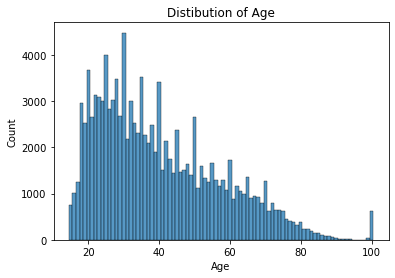

In [150]:
# Visualize the distribution of Age
sns.histplot(demographicInfo['Age']).set_title('Distibution of Age')
plt.show()

In [111]:
# Remove 'Age' and keep 'age_var3'
demographicInfo = demographicInfo.drop('Age',axis=1)

KeyError: "['Age'] not found in axis"

In [112]:
demographicInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Global11Regions    119088 non-null  category
 1   Gender             119088 non-null  category
 2   age_var3           119088 non-null  category
 3   Education          119088 non-null  category
 4   Household_Income   119088 non-null  category
 5   wbi                119088 non-null  category
 6   Subjective_Income  119088 non-null  category
 7   EMP_2010           119088 non-null  category
dtypes: category(8)
memory usage: 932.4 KB


##### Remarks
Based on the descriptive statistics of the demographicInfo dataset, we see the following:
- Youngest participant was 15 and oldest participant was 96; mean age of the sample is 40 years old
- The histogram for 'Age' is skewed to the right, which means the sample consists mostly of young adult and middle-aged participants.
- On a country-level, the highest number of respondants came from China.
- When grouped by global regions, Sub-Saharan Africa has the highest number of responses.
- Sample consists of more male participants.
- Sample consists of more participants who's highest level of educational attainment was Secondary School (8-15 years).
- Sample consists of more participants who's household income fell in the richest 20%.
- Sample consists of more participants who live in high-income countries.
- Most people's subjective feelings about household income indicate they are able to get by on their present income.
- Most people in sample are employed full time for an employer

##### Behavioural/Beliefs

In [113]:
questionDataset.describe()

,W1,W2,W3,W4,W5A,W5B,W5C,W5D,W5E,W5F,...,MH3D,MH4A,MH4B,MH5,MH6,MH7A,W27,W28,W29,W30
count,119088,119088,119088.0,119088.0,119088,119088.0,119088,119088.0,119088,119088,...,119088.0,119088.0,119088.0,119088.0,119088,119088.0,119088,119088.0,119088.0,119088.0
unique,5,5,5.0,5.0,5,5.0,5,5.0,5,5,...,5.0,5.0,5.0,4.0,3,3.0,3,7.0,5.0,5.0
top,2,2,2.0,2.0,2,2.0,1,2.0,1,2,...,2.0,1.0,1.0,2.0,2,2.0,1,3.0,3.0,2.0
freq,60006,46624,65327.0,47521.0,49252,35732.0,44364,48169.0,52915,49363,...,42792.0,89796.0,66898.0,47703.0,69635,92839.0,97080,45347.0,53966.0,45278.0


Let's generate a correlation between all the features of this dataset. Since data are ordinal in nature, we use Kendall's Rank Correlation. We then visualize the correlation matrix as a heatmap using the Seaborn library.

In [114]:
# Calculating Kendall's Rank correlation 
# The corr function 
kendallCorr = questionDataset.astype(float).corr(method='kendall')

C:\Users\micza\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Text(0.5, 1.0, 'Correlations of Behavioural/Belief Features')

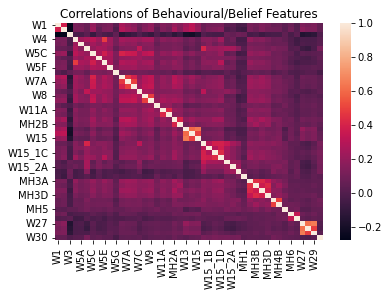

In [152]:
sns.heatmap(kendallCorr).set_title("Correlations of Behavioural/Belief Features") # Visualize the correlation matrix as a heatmap

##### Remarks
Based on the correlation matrix visualized above, there does not appear to be any meaningful strong correlations in the dataset. We do see that there are clusters in the heatmap that indicate strong positive correlations; however, these correlations were expected due to sections of the questionnaire having similar themes.

#### Initial Classification Models

As a first step, we will fit a Logistic Regression Classifier on the final dataset consisting of both demographicInfo and questionDataset.

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

##### Generate the final dataset
But first, let's generate the final dataset

##### Preprocessing of Country

Before moving forward with any classification models, it will be necessary to convert the strings in 'COUNTRYNEW' using LabelEncoder():

In [117]:
#le_country = preprocessing.LabelEncoder()
#le_country.fit(demographicInfo['COUNTRYNEW'])

In [118]:
#list(le_country.classes_)

In [119]:
#demographics = demographicInfo.copy().drop(['COUNTRYNEW'],axis=1)
#demographicInfo['COUNTRYNEW'] = le_country.transform(demographicInfo['COUNTRYNEW'])
#demographicInfo

In [120]:
demographicInfo.head()

,Global11Regions,Gender,age_var3,Education,Household_Income,wbi,Subjective_Income,EMP_2010
0,9,2,4,2,5.0,4,2,6.0
1,9,1,1,3,4.0,4,1,1.0
2,9,1,2,3,4.0,4,1,1.0
3,9,2,4,3,4.0,4,2,1.0
4,9,1,3,2,2.0,4,4,6.0


Now let's generate the final dataset by concatenating demographicInfo with questionDataset:

In [121]:
dataset = pd.concat([demographicInfo, questionDataset],axis=1)
dataset.shape # 119 088 entries and 55 columns/features

(119088, 54)

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Global11Regions    119088 non-null  category
 1   Gender             119088 non-null  category
 2   age_var3           119088 non-null  category
 3   Education          119088 non-null  category
 4   Household_Income   119088 non-null  category
 5   wbi                119088 non-null  category
 6   Subjective_Income  119088 non-null  category
 7   EMP_2010           119088 non-null  category
 8   W1                 119088 non-null  category
 9   W2                 119088 non-null  category
 10  W3                 119088 non-null  category
 11  W4                 119088 non-null  category
 12  W5A                119088 non-null  category
 13  W5B                119088 non-null  category
 14  W5C                119088 non-null  category
 15  W5D                119088 non-null

In [123]:
dataset['MH7A'].value_counts()

2.0     92839
1.0     23971
99.0     2278
Name: MH7A, dtype: int64

In [131]:
dataset = dataset[(dataset['MH7A'] == 1.0) | (dataset['MH7A'] == 2.0)]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116810 entries, 0 to 119087
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Global11Regions    116810 non-null  category
 1   Gender             116810 non-null  category
 2   age_var3           116810 non-null  category
 3   Education          116810 non-null  category
 4   Household_Income   116810 non-null  category
 5   wbi                116810 non-null  category
 6   Subjective_Income  116810 non-null  category
 7   EMP_2010           116810 non-null  category
 8   W1                 116810 non-null  category
 9   W2                 116810 non-null  category
 10  W3                 116810 non-null  category
 11  W4                 116810 non-null  category
 12  W5A                116810 non-null  category
 13  W5B                116810 non-null  category
 14  W5C                116810 non-null  category
 15  W5D                116810 non-null

Split the dependent variable/label from the independent variables:
- MH7A is the dependent variable/label -- the questionnaire asked the following: Have Been Anxious/Depressed

In [132]:
y = dataset['MH7A'] # The label: MH7A 
y.shape # 119 088 entries

(116810,)

In [133]:
X = dataset.drop(columns='MH7A') # The independent variables/features used for classification
X.shape # 119 088 entries and 54 columns/features

(116810, 53)

Split the dataset into training set and test set

In [134]:
# 70% training and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [135]:
X_train.shape

(81767, 53)

In [136]:
y_train.shape

(81767,)

In [137]:
X_test.shape

(35043, 53)

In [138]:
y_test.shape

(35043,)

Check the distribution of the dependent variable in both training and testing sets

<AxesSubplot:title={'center':'Have felt anxious/depressed: Training set'}>

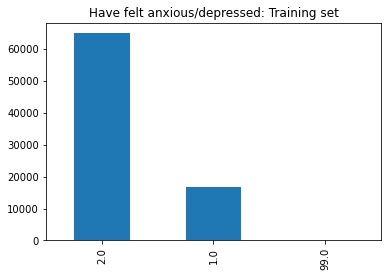

In [139]:
# Training Set
y_train.value_counts().plot(kind='bar', title='Have felt anxious/depressed: Training set')

<AxesSubplot:title={'center':'Have felt anxious/depressed: Testing set'}>

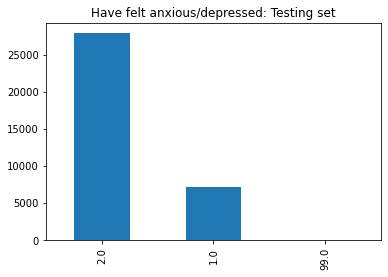

In [140]:
# Testing Set
y_test.value_counts().plot(kind='bar', title='Have felt anxious/depressed: Testing set')

Fit a Logistic Regression Classifier using all the features

In [141]:
# Create Decision Tree Classifier object
clfDT = tree.DecisionTreeClassifier()

In [142]:
# Fit the model
clfDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [143]:
# Predicting labels for the Test Set
y_pred = clfDT.predict(X_test)

In [144]:
y_pred[0:5]

array([2., 1., 2., 2., 2.])

Creating the Confusion Matrix:

In [145]:
print(confusion_matrix(y_test, y_pred))

# TN, FP
# FN, TP
## y_pred: Predicted labels
## y_test: True Labels

[[ 2591  4589]
 [ 5333 22530]]


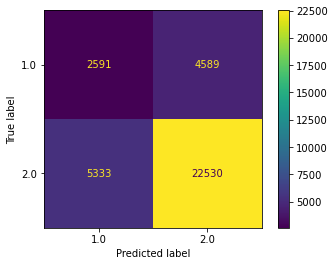

In [160]:
cm = confusion_matrix(y_test, y_pred, labels=clfDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clfDT.classes_)
disp.plot()
plt.show()

In [146]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7168621407984476
Precision: 0.3269813225643614
Recall: 0.36086350974930365
